### UTS VISI KOMPUTER KELAS B

NAMA: SITI MAWADDAH<br>
NPM: 1908107010031

# Nomor 1

<b>Buatlah program sederhana yang mengimplementasikan materi yang sudah dipelajari selama ini.
Jelaskan kegunaan dari program tersebut lalu jelaskan program tersebut dapat digunakan untuk
menyelesaikan masalah seperti apa. Kemudian jelaskan, teori visi komputer apa saja yang digunakan
di dalam program tersebut.
Tampilkan hasil program tersebut dengan menggunakan matplotlib.
Kumpulkan file ipynb dan file html. Pastikan file html menampilkan hasil dari program tersebut.
Apabila anda menggunakan gambar atau video tertentu, upload ke suatu website dan langsung baca
gambar atau video tersebut dari program anda.</b>

Program yang saya buat yaitu program untuk mendeteksi apakah seseorang tertidur atau tidak. Program ini dapat digunakan ketika pembelajaran online dengan live video untuk mendeteksi apakah siswa sedang tidur atau tidak. Jika terdeteksi sedang tidur, maka videonya akan diberikan filter yang menandakan siswa tersebut sedang menutup matanya.

Program ini bekerja dengan menggunakan teori deteksi wajah dan mata pada opencv menggunakan haarcascade. Jika wajahnya terdeteksi namun matanya tidak terdeteksi maka dapat disimpulkan objek tersebut sedang menutup matanya sehingga diberikan filter kucing dan tanda tertidur. Program ini juga memanfaatkan konversi warna menjadi grayscale pada frame sebelum dilakukan pendeteksian. Terdapat teori resize juga yang digunakan untuk menyesuaikan ukuran filter kucing dengan wajah yang terdeteksi. Ketika memberikan filter, program ini memanfaatkan ROI (Region of Interest) untuk mengolah frame pada bagian tertentu saja sehingga waktu dan memori yang dibutuhkan lebih hemat.

In [27]:
import cv2
import numpy as np

face_cascade = cv2.CascadeClassifier('./../cascades/haarcascade_frontalface_alt.xml')
eye_cascade = cv2.CascadeClassifier('./../cascades/haarcascade_eye.xml')

if face_cascade.empty():
    raise IOError('Unable to load the face cascade classifier xml file')
if eye_cascade.empty():
    raise IOError('Unable to load the eye cascade classifier xml file')
    
#read filter
cat = cv2.imread('cat.png')
zzz = cv2.imread('zzz.png')

#get shape of cat
original_cat_h,original_cat_w,cat_channels = cat.shape

#convert to gray
cat_gray = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
zzz_gray = cv2.cvtColor(zzz, cv2.COLOR_BGR2GRAY)

#create mask and inverse mask of cat
ret, original_mask = cv2.threshold(cat_gray, 10, 255, cv2.THRESH_BINARY_INV)
original_mask_inv = cv2.bitwise_not(original_mask)

#create mask and inverse mask of zzz
retz, original_maskz = cv2.threshold(zzz_gray, 10, 255, cv2.THRESH_BINARY_INV)
original_mask_invz = cv2.bitwise_not(original_maskz)
    
    
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
frame_h, frame_w = frame.shape[:2]

takewake = True
takesleep = True

while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        
        if takewake:
            cv2.imwrite('wake.jpg', frame)
            takewake = False
        
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) == 0:
            #cat size in relation to face by scaling
            cat_width = int(1.5 * w)
            cat_height = int(cat_width * original_cat_h / original_cat_w)

            #setting location of coordinates of cat
            cat_x1 = x+w - int(w/2) - int(cat_width/2)
            cat_x2 = cat_x1 + cat_width
            cat_y1 = y - int(h*0.5)
            cat_y2 = cat_y1 + cat_height 

            #check to see if out of frame
            if cat_x1 < 0:
                cat_x1 = 0
            if cat_y1 < 0:
                cat_y1 = 0
            if cat_x2 > frame_w:
                cat_x2 = frame_w
            if cat_y2 > frame_h:
                cat_y2 = frame_h

            #Account for any out of frame changes
            cat_width = cat_x2 - cat_x1
            cat_height = cat_y2 - cat_y1

            #resize filter to fit on face
            cat = cv2.resize(cat, (cat_width,cat_height), interpolation = cv2.INTER_AREA)
            mask = cv2.resize(original_mask, (cat_width,cat_height), interpolation = cv2.INTER_AREA)
            mask_inv = cv2.resize(original_mask_inv, (cat_width,cat_height), interpolation = cv2.INTER_AREA)
            
            zzz = cv2.resize(zzz, (100,100), interpolation = cv2.INTER_AREA)
            maskz = cv2.resize(original_maskz, (100,100), interpolation = cv2.INTER_AREA)
            mask_invz = cv2.resize(original_mask_invz, (100,100), interpolation = cv2.INTER_AREA)

            #take ROI for cat from background that is equal to size of cat image
            roi = frame[cat_y1:cat_y2, cat_x1:cat_x2]
            roiz = frame[0:100, 0:100]

            #original image in background (bg) where cat is not
            roi_bg = cv2.bitwise_and(roi,roi,mask = mask)
            roi_fg = cv2.bitwise_and(cat,cat,mask=mask_inv)
            dst = cv2.add(roi_bg,roi_fg)
            
            roiz_bg = cv2.bitwise_and(roiz,roiz,mask = maskz)
            roiz_fg = cv2.bitwise_and(zzz,zzz,mask=mask_invz)
            dstz = cv2.add(roiz_bg,roiz_fg)

            #put back in original image
            frame[cat_y1:cat_y2, cat_x1:cat_x2] = dst
            frame[0:100, 0:100] = dstz
            
            if takesleep:
                cv2.imwrite('sleep.jpg', frame)
                takesleep = False
            
    cv2.imshow('Eye Detector', frame)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

Text(0.5, 1.0, 'Sleep')

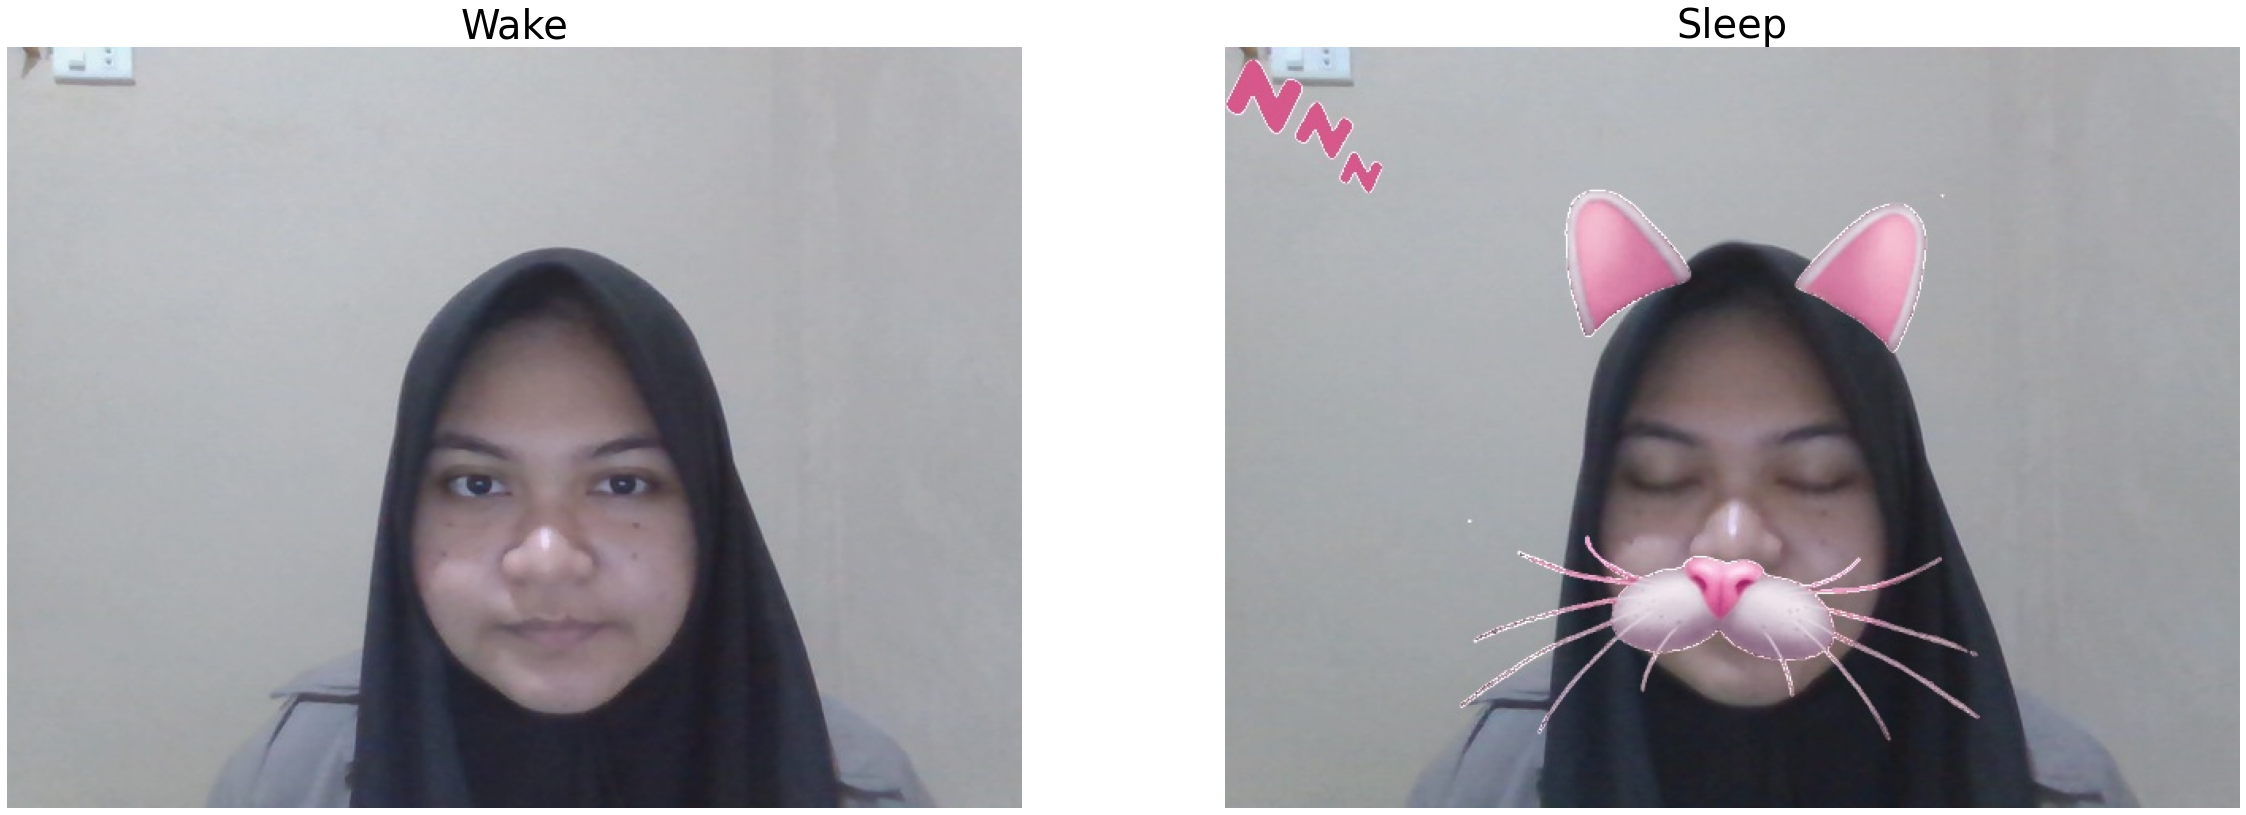

In [28]:
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(40, 35))

# setting values to rows and column variables
rows = 1
columns = 2

Images = []
# reading images
Images.append(cv2.imread('wake.jpg'))
Images.append(cv2.imread('sleep.jpg'))

fig.add_subplot(rows, columns, 1)
plt.imshow(cv2.cvtColor(Images[0], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(label='Wake',fontsize=40,)

fig.add_subplot(rows, columns, 2)
plt.imshow(cv2.cvtColor(Images[1], cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(label='Sleep',fontsize=40,)



# Nomor 2

<b>Jelaskan mengapa gambar berwarna itu penting. Apabila warna penting pada suatu gambar, mengapa gambar grayscale tetap diperlukan? Apa yang bisa anda simpulkan dari gambar berikut?</b>

Gambar berwarna penting karena secara natural manusia lebih mudah membedakan objek ketika gambar yang dilihat dalam keadaan berwarna dan lebih menarik. Format warna yang digunakan dalam citra digital pun berbeda-beda tergantung pada kegunaannya. Ada format warna yang cocok digunakan untuk kamera, ada juga format warna yang cocok digunakan perangkat output seperti televisi dan sebagainya.
Sementara gambar Grayscale penting ketika kita ingin melakukan pemrosesan image tapi tidak memerlukan informasi warna. Dengan menggunakan image grayscale, memori yang dibutuhkan lebih sedikit sehingga proses komputasi menjadi lebih cepat.

Gambar tersebut merupakan gambar berwarna. Ketika melihatnya, manusia akan langsung tahu objek apa saja yang ada di dalam gambar dan mudah untuk membedakannya. Contohnya, kita bisa menyimpulkan bahwa di dalam gambar terdapat satu mobil berwarna biru dan satu mobil berwarna merah. Dapat disimpulkan juga bahwa gambar tersebut diambil pada persimpangan di jalan raya dengan banyak objek-objek lain seperti pohon, bangunan, dan rambu-rambu lalu lintas. Sedangkan jika gambar tersebut diberikan kepada komputer, akan lebih mudah jika diubah menjadi gambar grayscale agar komputer dapat melakukan komputasi untuk mendeteksi objek-objek pada gambar tersebut.

# Nomor 3

<b>Apa yang dimaksud dengan convolution? Apakah kegunaannya pada image filtering?</b>

Convolution adalah proses operasi matematika pada dua fungsi yang menghasilkan fungsi ketiga yang menyatakan bagaimana bentuk yang satu diubah oleh yang lain. Pada image filtering, image yang akan difilter berperan sebagai fungsi pertama, sedangkan filternya berperan sebagai fungsi kedua. Hasil image yang telah difilter merupakan fungsi ketiga yang juga merupakan output dari proses konvolusi.

Ketika melakukan image filtering, dibutuhkan kernel (fungsi kedua) yang akan dikenakan kepada gambar(fungsi pertama) untuk memfilter gambar tersebut. Kernel yang diberikan dapat berbentuk HPF ataupun LPF tergantung tujuan filternya.

Contohnya ketika ingin membuang noise pada gambar, dapat dilakukan dengan membuang frekuensi tinggi dan hanya mengambil frekuensi rendah. Pada kasus tersebut, kernel yang digunakan adalah kernel LPF. Kemudian setiap titik pada gambar akan diproses satu persatu menggunakan kernel yang diberikan. Proses tersebut yang disebut dengan convolution.

# Nomor 4

<b>Apa yang dimaksud dengan thresholding? Apakah kegunaan dari thresholding dalam proses edge detection?</b>

Threshold adalah ambang batas berupa suatu nilai yang telah ditetapkan. Sedangkan thresholding adalah proses memberikan threshold yang biasanya digunakan dalam proses deteksi oleh komputer untuk menghilangkan False Positive.

Dalam proses edge detection atau deteksi tepi, threshold diberikan ke semua tepi yang terdeteksi untuk menghilangkan False Positive. Adapun False Positive artinya adalah suatu nilai yang terdeteksi benar namun sebenarnya salah. Dengan memberikan threshold, nilai-nilai False Positive dapat dihilangkan karena tidak memenuhi batas yang diberikan oleh threshold.

Salah satu algoritma yang banyak digunakan dalam edge detection yaitu algoritma Canny. Algoritma ini juga mengimplementasikan thresholding ketika mendeteksi tepi. Implementasinya dilakukan dengan menerapkan ambang ganda (double threshold) ke semua tepi yang terdeteksi untuk menghilangkan False Positive.